##### Data Split into train test and validation

##### Importing Libraries

In [85]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import shutil
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
import cv2
import pandas as pd
import pickle

In [2]:
data_dir = r"C:\Users\manik\OneDrive\Desktop\Semester1\EMSE_6575_AppliedML\Project\Cyclone_Wildfire_Flood_Earthquake_Database"

In [3]:
train_data_dir = r"C:\Users\manik\OneDrive\Desktop\Semester1\EMSE_6575_AppliedML\Project\train"
validation_data_dir = r"C:\Users\manik\OneDrive\Desktop\Semester1\EMSE_6575_AppliedML\Project\validation"
test_data_dir = r"C:\Users\manik\OneDrive\Desktop\Semester1\EMSE_6575_AppliedML\Project\test"

In [4]:
for directory in [train_data_dir, validation_data_dir, test_data_dir]:
    if os.path.exists(directory):
        shutil.rmtree(directory)

In [5]:
for directory in [train_data_dir, validation_data_dir, test_data_dir]:
    os.makedirs(directory)


In [6]:
class_directories = [os.path.join(data_dir, d) for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]


In [7]:
class_directories

['C:\\Users\\manik\\OneDrive\\Desktop\\Semester1\\EMSE_6575_AppliedML\\Project\\Cyclone_Wildfire_Flood_Earthquake_Database\\Cyclone',
 'C:\\Users\\manik\\OneDrive\\Desktop\\Semester1\\EMSE_6575_AppliedML\\Project\\Cyclone_Wildfire_Flood_Earthquake_Database\\Earthquake',
 'C:\\Users\\manik\\OneDrive\\Desktop\\Semester1\\EMSE_6575_AppliedML\\Project\\Cyclone_Wildfire_Flood_Earthquake_Database\\Flood',
 'C:\\Users\\manik\\OneDrive\\Desktop\\Semester1\\EMSE_6575_AppliedML\\Project\\Cyclone_Wildfire_Flood_Earthquake_Database\\NoRisk',
 'C:\\Users\\manik\\OneDrive\\Desktop\\Semester1\\EMSE_6575_AppliedML\\Project\\Cyclone_Wildfire_Flood_Earthquake_Database\\Wildfire']

In [8]:
for class_directory in class_directories:
    class_name = os.path.basename(class_directory)

    # List all image files in the current class directory
    
    class_images = [os.path.join(class_directory, f) for f in os.listdir(class_directory)]

    # Split the data into training, validation, and test sets
    train_images, temp_images = train_test_split(class_images, test_size=0.2, random_state=42)
    validation_images, test_images = train_test_split(temp_images, test_size=0.5, random_state=42)

    # Move images to the new directories
    def move_images(source_paths, destination_dir):
        for image_path in source_paths:
            image_name = os.path.basename(image_path)
            new_path = os.path.join(destination_dir, class_name, image_name)
            os.makedirs(os.path.join(destination_dir, class_name), exist_ok=True)
            shutil.copy(image_path, new_path)


    move_images(train_images, train_data_dir)
    move_images(validation_images, validation_data_dir)
    move_images(test_images, test_data_dir)

##### Preprocessing the images

In [9]:
# Create data generators
batch_size = 32
img_height, img_width = 500, 500

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 3964 images belonging to 5 classes.
Found 496 images belonging to 5 classes.


In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
# model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
# model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))


In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:
history = model.fit(
    train_generator,
    batch_size=256,
    epochs=8,
    validation_data=validation_generator
)

Epoch 1/8
124/124 [==============================] - 706s 6s/step - loss: 1.6505 - accuracy: 0.5595 - val_loss: 0.9958 - val_accuracy: 0.6351
Epoch 2/8
124/124 [==============================] - 694s 6s/step - loss: 0.6238 - accuracy: 0.7836 - val_loss: 0.6606 - val_accuracy: 0.8125
Epoch 3/8
124/124 [==============================] - 705s 6s/step - loss: 0.2970 - accuracy: 0.9082 - val_loss: 0.7095 - val_accuracy: 0.8024
Epoch 4/8
124/124 [==============================] - 679s 5s/step - loss: 0.1532 - accuracy: 0.9551 - val_loss: 0.7973 - val_accuracy: 0.8145
Epoch 5/8
124/124 [==============================] - 674s 5s/step - loss: 0.0746 - accuracy: 0.9760 - val_loss: 1.2553 - val_accuracy: 0.7419
Epoch 6/8
124/124 [==============================] - 665s 5s/step - loss: 0.0342 - accuracy: 0.9902 - val_loss: 1.3527 - val_accuracy: 0.7500
Epoch 7/8
124/124 [==============================] - 676s 5s/step - loss: 0.0344 - accuracy: 0.9904 - val_loss: 1.1065 - val_accuracy: 0.7823
Epoch 

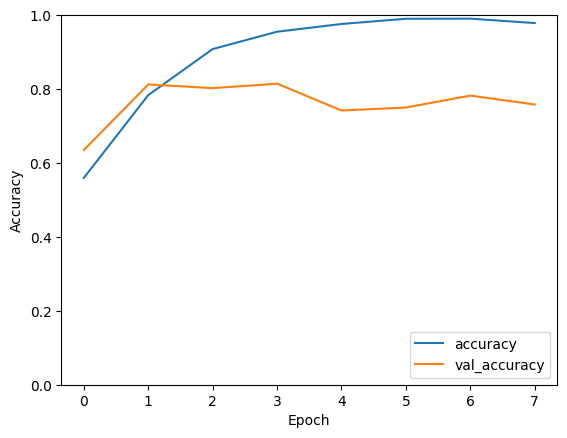

In [13]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [17]:
class_directories_test = [os.path.join(test_data_dir, d) for d in os.listdir(test_data_dir) if os.path.isdir(os.path.join(test_data_dir, d))]


In [22]:
mapper_output = train_generator.class_indices

In [50]:
mapper_output

{'Cyclone': 0, 'Earthquake': 1, 'Flood': 2, 'NoRisk': 3, 'Wildfire': 4}

In [54]:
def get_key_from_value(dictionary, target_value):
    for key, value in dictionary.items():
        if value == target_value:
            return key

In [96]:
actuals               = []
predictions_basemodel = []
for class_directory in class_directories_test:
    class_name = os.path.basename(class_directory)
    
    for f in os.listdir(class_directory):
        actuals.append(class_directory.split("\\")[-1])
        img = cv2.imread(os.path.join(class_directory, f))
        img = img / 255.0
        img = cv2.resize(img, (500,500))
        img = img.reshape(1,500,500,3)
        pred = get_key_from_value(mapper_output, np.argmax(model.predict(img)[0]))
        
        predictions_basemodel.append(pred)

1/1 [==============================] - 0s 141ms/step


In [97]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [98]:
accuracy_score(actuals, predictions_basemodel)

0.5983935742971888

In [99]:
print(classification_report(actuals, predictions_basemodel))

              precision    recall  f1-score   support

     Cyclone       0.42      0.59      0.49        93
  Earthquake       0.77      0.63      0.69       135
       Flood       0.68      0.46      0.55       108
      NoRisk       0.74      0.83      0.78        54
    Wildfire       0.52      0.58      0.55       108

    accuracy                           0.60       498
   macro avg       0.62      0.62      0.61       498
weighted avg       0.63      0.60      0.60       498



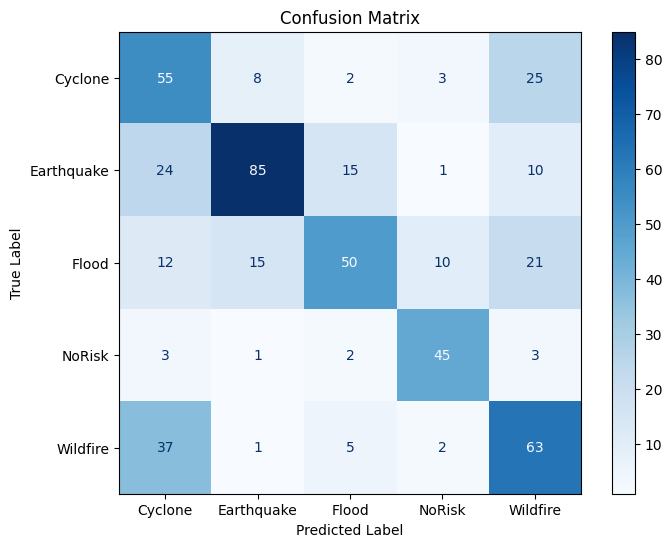

In [100]:
cm = confusion_matrix(actuals, predictions_basemodel)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mapper_output.keys())

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the confusion matrix as a heatmap
disp.plot(cmap='Blues', values_format='d', ax=ax)

# Customize the plot (optional)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [86]:
with open('model.pickle', 'wb') as file:
    pickle.dump(model, file)

##### VGG19 Model For Transfer Learning

In [88]:
from tensorflow.keras.applications import VGG19

In [93]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Build the model on top of the pre-trained model
model_vgg19 = models.Sequential()
model_vgg19.add(base_model)
model_vgg19.add(layers.Flatten())
model_vgg19.add(layers.Dense(128, activation='relu'))
model_vgg19.add(layers.Dense(5, activation='softmax'))

model_vgg19.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_vgg19.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

Epoch 1/5
124/124 [==============================] - 3227s 26s/step - loss: 1.3872 - accuracy: 0.7366 - val_loss: 0.3829 - val_accuracy: 0.8609
Epoch 2/5
124/124 [==============================] - 3545s 29s/step - loss: 0.2490 - accuracy: 0.9178 - val_loss: 0.4340 - val_accuracy: 0.8750
Epoch 3/5
  1/124 [..............................] - ETA: 57:37 - loss: 0.1248 - accuracy: 0.9688

KeyboardInterrupt: 

In [101]:
predictions_vgg19 = []
for class_directory in class_directories_test:
    class_name = os.path.basename(class_directory)
    
    for f in os.listdir(class_directory):
        
        img = cv2.imread(os.path.join(class_directory, f))
        img = img / 255.0
        img = cv2.resize(img, (500,500))
        img = img.reshape(1,500,500,3)
        pred = get_key_from_value(mapper_output, np.argmax(model_vgg19.predict(img)[0]))
        
        predictions_vgg19.append(pred)

1/1 [==============================] - 1s 823ms/step


In [102]:
accuracy_score(actuals, predictions_vgg19)

0.8253012048192772

In [103]:
print(classification_report(actuals, predictions_vgg19))

              precision    recall  f1-score   support

     Cyclone       1.00      0.70      0.82        93
  Earthquake       0.82      0.92      0.87       135
       Flood       0.84      0.68      0.75       108
      NoRisk       0.64      0.91      0.75        54
    Wildfire       0.85      0.93      0.88       108

    accuracy                           0.83       498
   macro avg       0.83      0.83      0.81       498
weighted avg       0.84      0.83      0.82       498



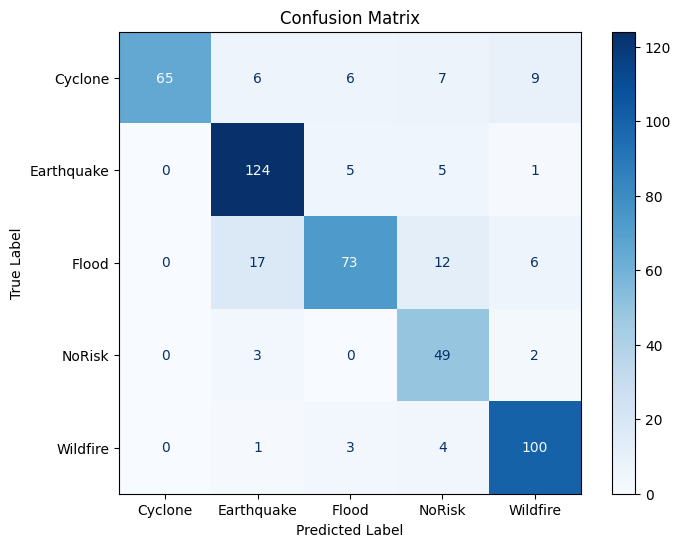

In [104]:
cm = confusion_matrix(actuals, predictions_vgg19)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mapper_output.keys())

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the confusion matrix as a heatmap
disp.plot(cmap='Blues', values_format='d', ax=ax)

# Customize the plot (optional)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [105]:
with open('deployed_model.pickle', 'wb') as file:
    pickle.dump(model_vgg19, file)